Line A (through 0,0) slope: 5
Line B (through 1,0) slope: -3


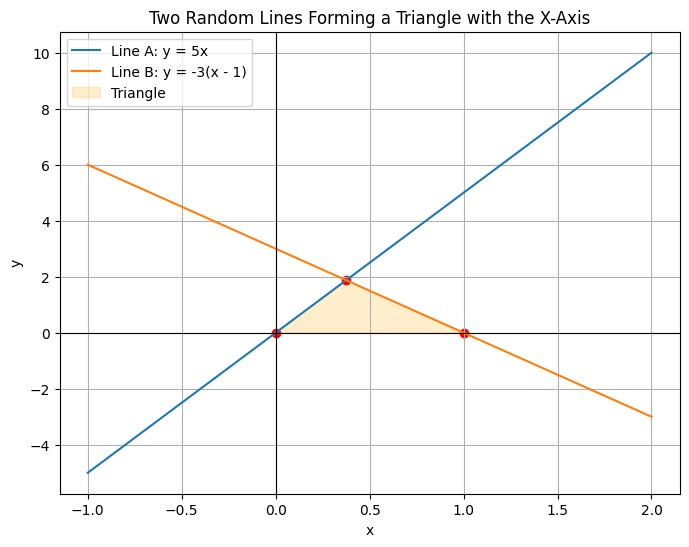

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random

# --- Random slopes ---
m1 = random.randint(1, 5)      # positive slope
m2 = random.randint(-5, -1)    # negative slope

print(f"Line A (through 0,0) slope: {m1}")
print(f"Line B (through 1,0) slope: {m2}")

# --- Define the two lines ---
# Line A: y = m1 * x
# Line B: passes through (1,0)
#         slope m2 => y - 0 = m2 (x - 1) => y = m2(x - 1)

def lineA(x): return m1 * x
def lineB(x): return m2 * (x - 1)

# --- Find intersections with the x-axis (y = 0) ---
# Line A hits at x = 0
xA = 0

# Line B hits at x = 1
xB = 1

# --- Find intersection between lines A and B ---
# Solve: m1*x = m2(x - 1)
# m1*x = m2*x - m2  => (m1 - m2)x = -m2
# x = -m2 / (m1 - m2)
xI = -m2 / (m1 - m2)
yI = lineA(xI)

# --- Plotting range: capture whole triangle ---
xmin = min(xA, xB, xI) - 1
xmax = max(xA, xB, xI) + 1
x = np.linspace(xmin, xmax, 400)

# --- Plot ---
plt.figure(figsize=(8,6))
plt.plot(x, lineA(x), label=f"Line A: y = {m1}x")
plt.plot(x, lineB(x), label=f"Line B: y = {m2}(x - 1)")

# --- Highlight triangle ---
plt.fill([xA, xB, xI], [0, 0, yI], alpha=0.2, color='orange', label="Triangle")

# Axes and formatting
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)

plt.scatter([xA, xB, xI], [0, 0, yI], color='red')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Two Random Lines Forming a Triangle with the X-Axis")
plt.legend()
plt.grid(True)
plt.show()


Line A (through 0,0) slope: 13
Line B (through 1,0) slope: 5


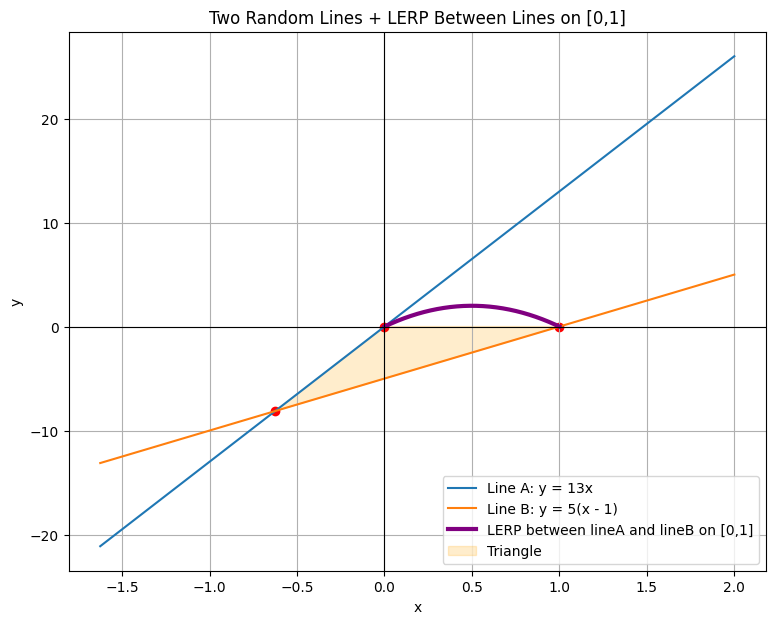

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import random

# --- Random slopes ---
m1 = random.randint(1, 15)      # positive slope
m2 = random.randint(1, 15)    # negative slope

print(f"Line A (through 0,0) slope: {m1}")
print(f"Line B (through 1,0) slope: {m2}")

# --- Define the two lines ---
def lineA(x):
    return m1 * x              # passes through (0,0)

def lineB(x):
    return m2 * (x - 1)        # passes through (1,0)

# --- Intersection with x-axis ---
xA = 0
xB = 1

# --- Intersection between A and B ---
xI = -m2 / (m1 - m2)
yI = lineA(xI)

# --- LERP curve on x ∈ [0,1] ---
t = np.linspace(0, 1, 400)

# linear interpolation between lineA(t) and lineB(t)
curve = (1 - t) * lineA(t) + t * lineB(t)

# --- Plotting window ---
xmin = min(xA, xB, xI) - 1
xmax = max(xA, xB, xI) + 1
x_plot = np.linspace(xmin, xmax, 400)

plt.figure(figsize=(9,7))

# Lines
plt.plot(x_plot, lineA(x_plot), label=f"Line A: y = {m1}x")
plt.plot(x_plot, lineB(x_plot), label=f"Line B: y = {m2}(x - 1)")

# LERP curve
plt.plot(t, curve, color='purple', linewidth=3,
         label="LERP between lineA and lineB on [0,1]")

# Triangle
plt.fill([xA, xB, xI], [0, 0, yI], alpha=0.2, color='orange', label="Triangle")
plt.scatter([xA, xB, xI], [0, 0, yI], color='red')

plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Two Random Lines + LERP Between Lines on [0,1]")
plt.legend()
plt.grid(True)
plt.show()


Gradients: [-0.6004434818676956, -0.2604358962303013, -0.38525743948839053, -0.2291083190598826, 0.19464708889736126]


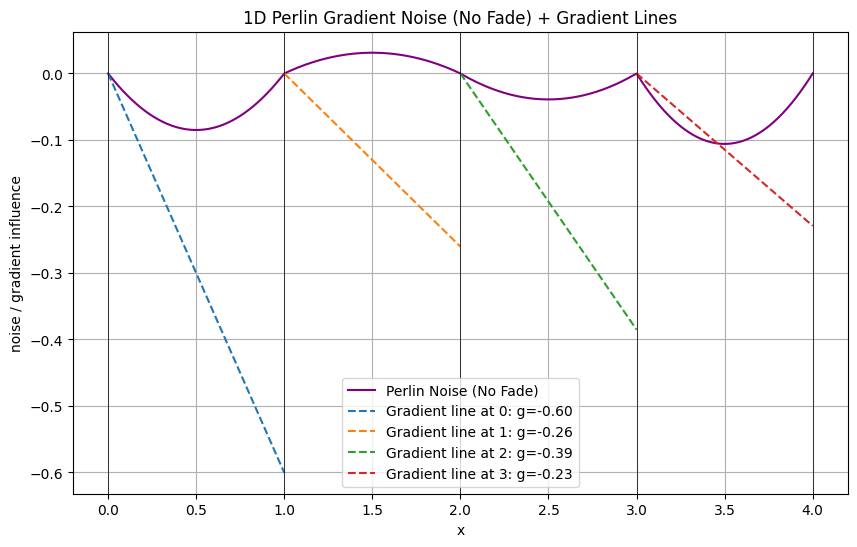

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import random

# ---------------------------------------------------
# 1. Choose 5 random gradients for integer points 0..4
# ---------------------------------------------------
gradients = [random.uniform(-1, 1) for _ in range(5)]
print("Gradients:", gradients)

# Gradient function g_i influences are defined as:
# influence = gradient * (x - i)


# ---------------------------------------------------
# 2. Define Perlin-style gradient noise WITHOUT smoothing
# ---------------------------------------------------
def perlin_no_fade(x):
    x0 = int(np.floor(x))
    t = x - x0

    if x0 < 0: 
        x0 = 0
    if x0 > 3:  # only intervals 0-1,1-2,2-3,3-4
        x0 = 3

    g0 = gradients[x0]
    g1 = gradients[x0 + 1]

    # distances
    d0 = t
    d1 = t - 1

    # influences
    v0 = g0 * d0
    v1 = g1 * d1

    # no smoothing: raw linear interpolation
    return v0 + (v1 - v0) * t


# ---------------------------------------------------
# 3. Plot gradient lines and the resulting noise
# ---------------------------------------------------
x_plot = np.linspace(0, 4, 800)
noise = np.array([perlin_no_fade(x) for x in x_plot])

fig, ax = plt.subplots(figsize=(10,6))

# Plot noise
ax.plot(x_plot, noise, label="Perlin Noise (No Fade)", color="purple")

# Plot each gradient line in its interval
for i in range(4):
    xs = np.linspace(i, i+1, 200)
    g = gradients[i]
    ys = g * (xs - i)   # gradient line influence
    ax.plot(xs, ys, '--', label=f"Gradient line at {i}: g={g:.2f}")

# Visual reference lines at integer grid points
for i in range(5):
    ax.axvline(i, color="black", linewidth=0.5)

ax.set_xlabel("x")
ax.set_ylabel("noise / gradient influence")
ax.set_title("1D Perlin Gradient Noise (No Fade) + Gradient Lines")
ax.legend()
ax.grid(True)

plt.show()


Gradients: [0.2800800052722465, 0.7912842953405761, -0.30853416308619996, 0.3437501090013637, 0.473548384701199]


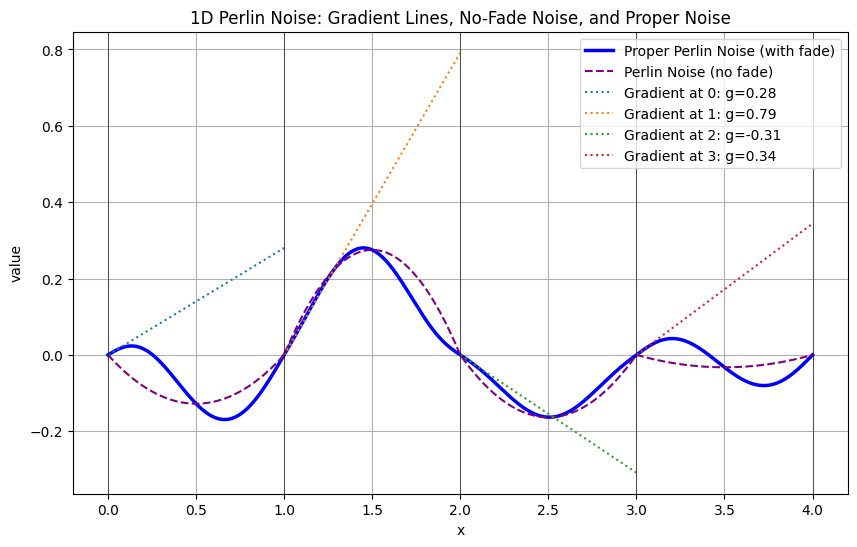

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import random

# ---------------------------------------------------
# 1. Choose 5 random gradients for integer points 0..4
# ---------------------------------------------------
gradients = [random.uniform(-1, 1) for _ in range(5)]
print("Gradients:", gradients)

# Gradient influence function:
# influence_i(x) = gradients[i] * (x - i)


# ---------------------------------------------------
# 2. Fade (smoothstep) function for proper Perlin noise
# ---------------------------------------------------
def fade(t):
    return 6*t**5 - 15*t**4 + 10*t**3


# ---------------------------------------------------
# 3. Perlin noise WITHOUT smoothing
# ---------------------------------------------------
def perlin_no_fade(x):
    x0 = int(np.floor(x))

    # clamp because we only have gradients[0..4]
    if x0 < 0:
        x0 = 0
    if x0 > 3:
        x0 = 3

    t = x - x0
    g0 = gradients[x0]
    g1 = gradients[x0 + 1]

    d0 = t
    d1 = t - 1

    v0 = g0 * d0
    v1 = g1 * d1

    return v0 + (v1 - v0) * t


# ---------------------------------------------------
# 4. Proper Perlin noise WITH smoothing (fade function)
# ---------------------------------------------------
def perlin_fade(x):
    x0 = int(np.floor(x))

    if x0 < 0:
        x0 = 0
    if x0 > 3:
        x0 = 3

    t = x - x0
    g0 = gradients[x0]
    g1 = gradients[x0 + 1]

    d0 = t
    d1 = t - 1

    v0 = g0 * d0
    v1 = g1 * d1

    # apply fade(t) instead of raw t
    u = fade(t)
    return v0 + (v1 - v0) * u


# ---------------------------------------------------
# 5. Plot everything together
# ---------------------------------------------------
x_plot = np.linspace(0, 4, 800)
noise_no_fade = np.array([perlin_no_fade(x) for x in x_plot])
noise_fade    = np.array([perlin_fade(x) for x in x_plot])

fig, ax = plt.subplots(figsize=(10,6))

# Proper Perlin noise
ax.plot(x_plot, noise_fade, color="blue", linewidth=2.5,
        label="Proper Perlin Noise (with fade)")

# Noise without fade (linear interpolation)
ax.plot(x_plot, noise_no_fade, color="purple", linestyle="--",
        label="Perlin Noise (no fade)")

# Gradient influence lines
for i in range(4):
    xs = np.linspace(i, i+1, 200)
    g = gradients[i]
    ys = g * (xs - i)
    ax.plot(xs, ys, linestyle=":", linewidth=1.5,
            label=f"Gradient at {i}: g={g:.2f}")

# Vertical grid boundaries
for i in range(5):
    ax.axvline(i, color="black", linewidth=0.4)

ax.set_xlabel("x")
ax.set_ylabel("value")
ax.set_title("1D Perlin Noise: Gradient Lines, No-Fade Noise, and Proper Noise")
ax.legend()
ax.grid(True)
plt.show()
